In [21]:
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression

In [22]:
df = pd.read_csv("data/carprices.csv")

In [23]:
df

,CarModel,Mileage,SellPrice,Age
0,BMW X5,69000,18000,6
1,BMW X5,35000,34000,3
2,BMW X5,57000,26100,5
3,BMW X5,22500,40000,2
4,BMW X5,46000,31500,4
5,Audi A5,59000,29400,5
6,Audi A5,52000,32000,5
7,Audi A5,72000,19300,6
8,Audi A5,91000,12000,8
9,Mercedez Benz C class,67000,22000,6


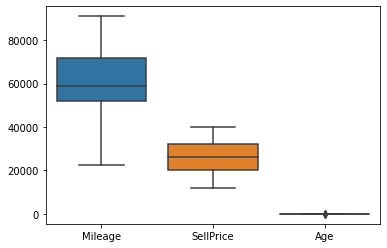

In [24]:
plt1 = sns.boxplot(data=df)

In [25]:
le = LabelEncoder()

In [26]:
dfle = df
dfle.CarModel = le.fit_transform(dfle.CarModel)
dfle

,CarModel,Mileage,SellPrice,Age
0,1,69000,18000,6
1,1,35000,34000,3
2,1,57000,26100,5
3,1,22500,40000,2
4,1,46000,31500,4
5,0,59000,29400,5
6,0,52000,32000,5
7,0,72000,19300,6
8,0,91000,12000,8
9,2,67000,22000,6


In [27]:
X = dfle[['CarModel','Mileage']].values

In [28]:
y = dfle.SellPrice.values

In [29]:
y

array([18000, 34000, 26100, 40000, 31500, 29400, 32000, 19300, 12000,
       22000, 20000, 21000, 33000])

In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
ct = ColumnTransformer([('CarModel', OneHotEncoder(), [0])], remainder = 'passthrough')

In [31]:
X = ct.fit_transform(X)
X

array([[0.00e+00, 1.00e+00, 0.00e+00, 6.90e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 3.50e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 5.70e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 2.25e+04],
       [0.00e+00, 1.00e+00, 0.00e+00, 4.60e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.90e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 5.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 7.20e+04],
       [1.00e+00, 0.00e+00, 0.00e+00, 9.10e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 6.70e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 8.30e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 7.90e+04],
       [0.00e+00, 0.00e+00, 1.00e+00, 5.90e+04]])

In [32]:
model = LinearRegression()
model.fit(X,y)

LinearRegression()

In [33]:
model.predict(X)

array([18769.45136671, 35181.51429015, 24561.94416322, 41215.36095318,
       29871.72922668, 27760.72346391, 31139.6775952 , 21485.52293435,
       12314.07600655, 26413.53866523, 18690.21493655, 20621.04586872,
       30275.20052957])

In [34]:
model.score(X,y)

0.9407475372588112